In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import math
import cv2
import imageio
from os import listdir
import warnings
import filecmp
from PIL import Image

In [15]:
apple=[]
prom=[]
orange=[]
banana=[]
eggplant=[]
IMG_SHAPE = 50
fruit_images=[]
fruit_labels=[]
#listdir("../input/train/Train")
base_path = "./rgb/"
pomogranate=base_path+'Pomegranate/'
for file in listdir(pomogranate):
    file_path = pomogranate + file
    if file.endswith('.jpg'):
            image = imageio.imread(file_path)
            if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
            image=cv2.resize(image,(50,50))
            image=image/255
            prom.append(image)
            fruit_images.append(image)
            fruit_labels.append(0)
app=base_path+'Apples/'
for file in listdir(app):
    if file.endswith('.jpg'):
        file_path = app + file
        image = imageio.imread(file_path)
        if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        image=cv2.resize(image,(50,50))
        image=image/255
        apple.append(image)
        fruit_images.append(image)
        fruit_labels.append(2)
oranj=base_path+'Orange/'
for file in listdir(oranj):
    if file.endswith('.jpg'):
        file_path = oranj + file
        image = imageio.imread(file_path)
        if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        image=cv2.resize(image,(50,50))
        image=image/255
        orange.append(image)
        fruit_images.append(image)
        fruit_labels.append(1)

        
banan=base_path+'Banana/'
for file in listdir(banan):
    if file.endswith('.jpg'):
        file_path = banan + file
        image = imageio.imread(file_path)
        if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        image=cv2.resize(image,(50,50))
        image=image/255
        banana.append(image)
        fruit_images.append(image)
        fruit_labels.append(3)
eggplan=base_path+'Eggplant/'
for file in listdir(eggplan):
    if file.endswith('.jpg'):
        file_path = eggplan + file
        image = imageio.imread(file_path)
        if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        image=cv2.resize(image,(50,50))
        image=image/255
        eggplant.append(image)
        fruit_images.append(image)
        fruit_labels.append(4)

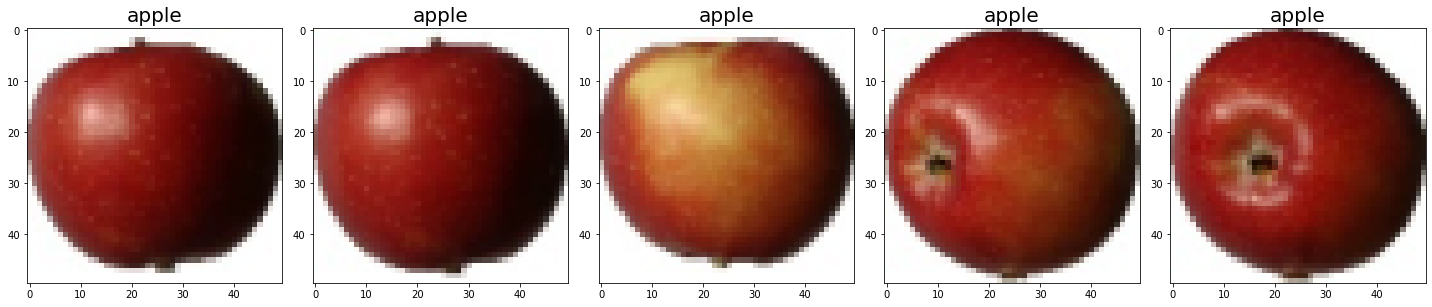

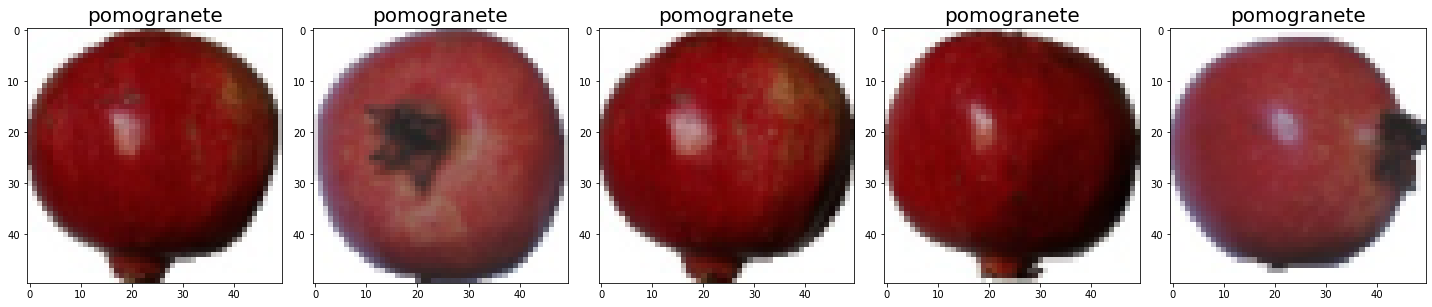

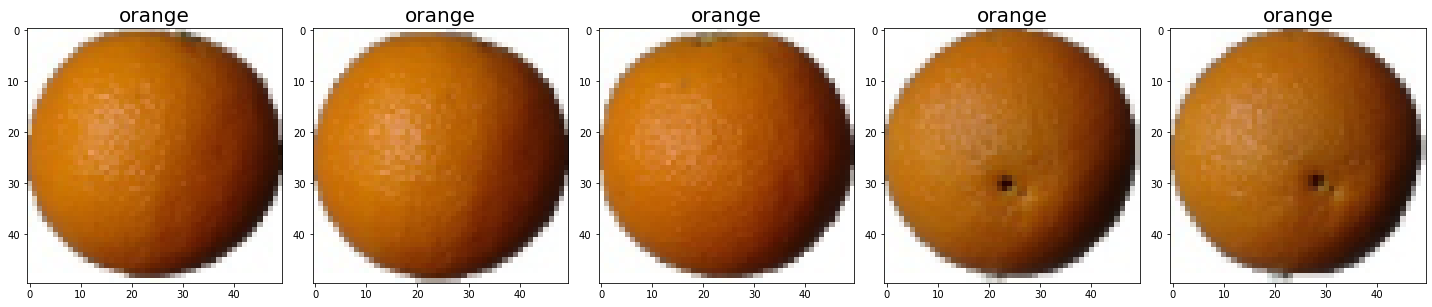

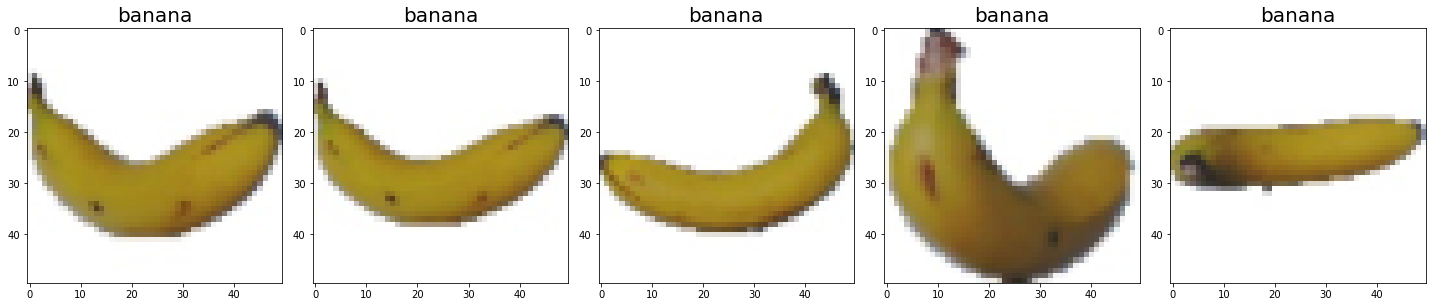

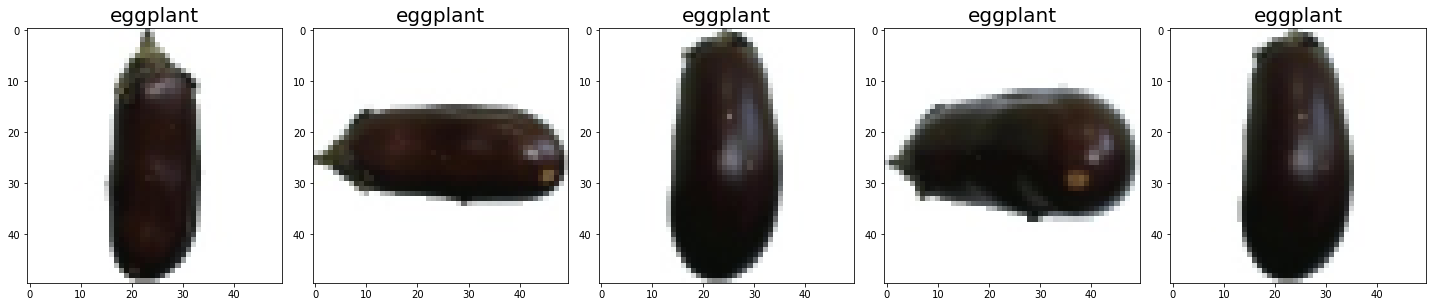

In [16]:
def ShowFirstFive(images_arr,title):

    fig, axes = plt.subplots(1, 5, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()
ShowFirstFive(apple,'apple')
ShowFirstFive(prom,'pomogranete')
ShowFirstFive(orange,'orange')
ShowFirstFive(banana,'banana')
ShowFirstFive(eggplant,'eggplant')


In [17]:
def reorder(old_list,order):
    new_list = []
    for i in order:
        new_list.append(old_list[i])
    return new_list

np.random.seed(seed=42)
indices = np.arange(len(fruit_labels))
np.random.shuffle(indices)
indices = indices.tolist()
fruit_labels = reorder(fruit_labels,indices)
fruit_images = reorder(fruit_images,indices)
image_array = np.array(fruit_images)
label_array = np.array(fruit_labels)

In [18]:
label_array=to_categorical(label_array,5)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(image_array,label_array, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [20]:
model =  Sequential([
    
    #convolutional layers
    Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3),padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu',padding='same'),
    MaxPooling2D(2,2),  
    Conv2D(128, (3,3), activation='relu',padding='same'),
    MaxPooling2D(2,2),
    
    # dense layer
    Flatten(),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])


In [21]:

l=[25]
for i in range(len(l)):
    model =  Sequential([
    
    #convolutional layers
    Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3),padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu',padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu',padding='same'),
    MaxPooling2D(2,2),
    
    # dense layer
    Flatten(),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=l[i],verbose=1)
    modelsub=model.predict(X_val,batch_size=None, verbose=1)
    c=0
    f=0
    for i in range(modelsub.shape[0]):
        if np.argmax(modelsub[i])==np.argmax(y_val[i]):
            c+=1
        else:
            f+=1
    accuracy=c/(c+f)
    print('Test Accuracy:',accuracy*100)
   

Epoch 1/25
1355/1355 [==============================] - 4s 3ms/step - loss: 0.5363 - accuracy: 0.7712
Epoch 2/25
1355/1355 [==============================] - 3s 2ms/step - loss: 0.0346 - accuracy: 0.9904
Epoch 3/25
1355/1355 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.9985
Epoch 4/25
1355/1355 [==============================] - 4s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/25
1355/1355 [==============================] - 3s 2ms/step - loss: 6.3438e-04 - accuracy: 1.0000
Epoch 6/25
1355/1355 [==============================] - 3s 2ms/step - loss: 5.0739e-04 - accuracy: 1.0000
Epoch 7/25
1355/1355 [==============================] - 4s 3ms/step - loss: 4.9156e-04 - accuracy: 1.0000
Epoch 8/25
1355/1355 [==============================] - 4s 3ms/step - loss: 2.1752e-04 - accuracy: 1.0000
Epoch 9/25
1355/1355 [==============================] - 4s 3ms/step - loss: 2.3364e-04 - accuracy: 1.0000
Epoch 10/25
1355/1355 [==============================] - 3s 2m

In [22]:
modelsub=model.predict(X_test,batch_size=None, verbose=1)
c=0
f=0
for i in range(modelsub.shape[0]):
    if np.argmax(modelsub[i])==np.argmax(y_test[i]):
        c+=1
    else:
        f+=1
    accuracy=c/(c+f)
print('Test Accuracy:',accuracy*100)

485/485 [==============================] - 0s 568us/step
Test Accuracy: 100.0


In [23]:
def get_images(ids, filepath):
    arr = []
    for i in range(len(ids)):
        image = plt.imread(filepath + ids[i]+'.jpg')
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        image=cv2.resize(image,(50,50))
        image=image/255
        arr.append(image)
    
    arr = np.array(arr)
    return arr

In [43]:
def label_to_name(n):
    if n == 0:
        return 'Pomegranate'
    elif n == 1:
        return 'Orange'
    elif n == 2:
        return 'Apple'
    elif n == 3:
        return 'Banana'
    elif n == 4:
        return 'Eggplant'

def Show(images_arr,titles):

    fig, axes = plt.subplots(1, len(titles), figsize=(20,20))
    i = 0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(titles[i],fontsize=20)
        i += 1
    plt.tight_layout()
    plt.show()

7/7 [==============================] - 0s 702us/step
{1: 'Apple', 2: 'Orange', 3: 'Pomegranate', 4: 'Eggplant', 5: 'Banana', 6: 'Banana', 7: 'Pomegranate'}


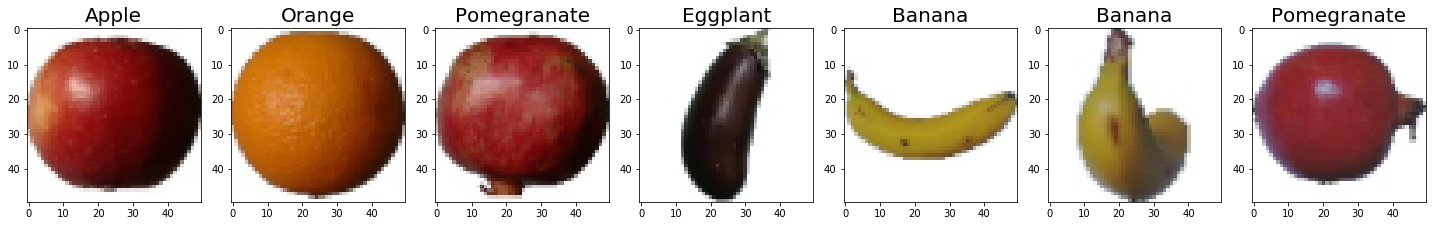

In [44]:
new_test = ['1', '2', '3', '4', '5', '6', '7']
ttt = get_images(ids=new_test, filepath='./')

l=dict()
iid=np.arange(1,8,1)

c=model.predict(ttt,batch_size=None, verbose=1)
for i in range(len(c)):
    l[i+1] = label_to_name(np.argmax(c[i]))

print(l)

Show(list(ttt), list(l.values()))